In [0]:
# 1. Define the "Target 15" Crops
target_crops = [
    'rice', 'maize', 'chickpea', 'lentil', 'pomegranate', 
    'banana', 'mango', 'grapes', 'apple', 'orange', 
    'papaya', 'coconut', 'cotton', 'jute', 'coffee'
]

In [0]:
# 2. Load Bronze Data
df_crop_bronze = spark.table("agriculture.bronze.crop_recommendation")

In [0]:
from pyspark.sql.functions import col, lower, trim

# 3. Apply Transformations
# - Rename N, P, K to match State Soil Profiles
# - Normalize crop name (lowercase, trim)
# - Filter to ONLY include the 15 target crops
df_crop_silver = df_crop_bronze \
    .withColumnRenamed("Nitrogen", "nitrogen") \
    .withColumnRenamed("phosphorus", "phosphorus") \
    .withColumnRenamed("potassium", "potassium") \
    .withColumnRenamed("label", "crop_name") \
    .withColumn("crop_name", lower(trim(col("crop_name")))) \
    .filter(col("crop_name").isin(target_crops)) \
    .select(
        col("nitrogen").cast("double"),
        col("phosphorus").cast("double"),
        col("potassium").cast("double"),
        col("temperature").cast("double"),
        col("humidity").cast("double"),
        col("ph").cast("double"),
        col("rainfall").cast("double"),
        col("crop_name")
    )

In [0]:
df_crop_silver.display()

nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop_name
90.0,42.0,43.0,20.87974371,82.00274423,6.502985292,202.9355362,rice
85.0,58.0,41.0,21.77046169,80.31964408,7.038096361,226.6555374,rice
60.0,55.0,44.0,23.00445915,82.3207629,7.840207144,263.9642476,rice
74.0,35.0,40.0,26.49109635,80.15836264,6.980400905,242.8640342,rice
78.0,42.0,42.0,20.13017482,81.60487287,7.628472891,262.7173405,rice
69.0,37.0,42.0,23.05804872,83.37011772,7.073453503,251.0549998,rice
69.0,55.0,38.0,22.70883798,82.63941394,5.70080568,271.3248604,rice
94.0,53.0,40.0,20.27774362,82.89408619,5.718627178,241.9741949,rice
89.0,54.0,38.0,24.51588066,83.5352163,6.685346424,230.4462359,rice
68.0,58.0,38.0,23.22397386,83.03322691,6.336253525,221.2091958,rice


In [0]:
# 4. Preview and Validation
# Check if we successfully filtered down to just your 15 crops
print(f"Original Row Count: {df_crop_bronze.count()}")
print(f"Filtered Row Count: {df_crop_silver.count()}")

Original Row Count: 2200
Filtered Row Count: 1500


In [0]:
#  Eliminated Crops
df_eliminated = df_crop_bronze \
    .withColumn("crop_name_normalized", lower(trim(col("label")))) \
    .filter(~col("crop_name_normalized").isin(target_crops)) \
    .select("crop_name_normalized") \
    .distinct() \
    .orderBy("crop_name_normalized")

# Display Results
print(" Crops eliminated from training data:")
display(df_eliminated)

 Crops eliminated from training data:


crop_name_normalized
blackgram
kidneybeans
mothbeans
mungbean
muskmelon
pigeonpeas
watermelon


In [0]:
display(df_crop_silver.groupBy("crop_name").count().orderBy("crop_name"))

crop_name,count
apple,100
banana,100
chickpea,100
coconut,100
coffee,100
cotton,100
grapes,100
jute,100
lentil,100
maize,100


=== Statistical Summary of Soil Nutrients ===


summary,nitrogen,phosphorus,potassium,ph
count,1500,1500,1500,1500
mean,52.56466666666667,56.082,57.28666666666667,6.482753970938669
stddev,36.943556530672296,36.67815154194238,58.38653795266752,0.6861759957684663
min,0.0,5.0,5.0,4.507523551
25%,22.0,29.0,24.0,6.000573725
50%,39.0,50.0,36.0,6.420018717
75%,85.0,71.0,52.0,6.93172108
max,140.0,145.0,205.0,8.868741443


=== Correlation Analysis ===


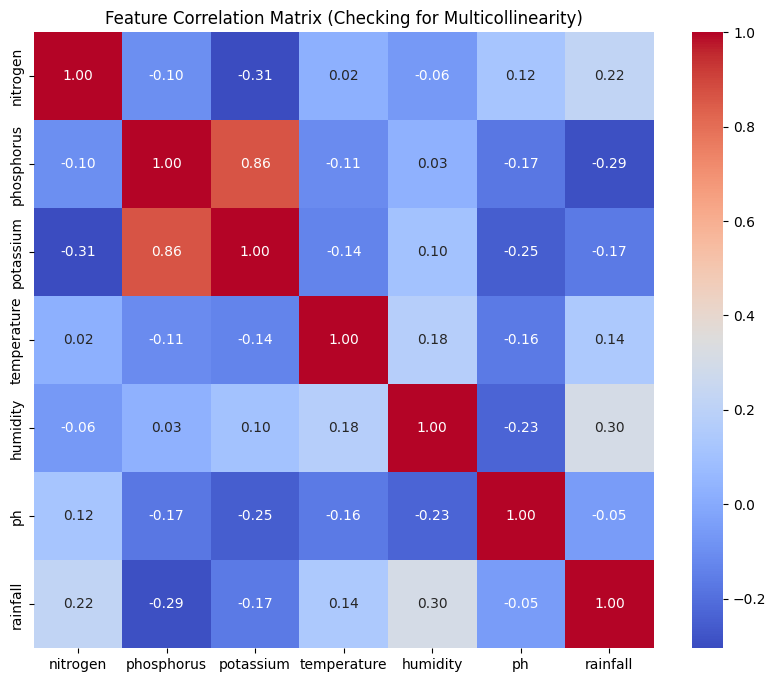

In [0]:
#DATA UNDERSTANDING 

import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Summary
print("=== Statistical Summary of Soil Nutrients ===")
display(df_crop_silver.select("nitrogen", "phosphorus", "potassium", "ph").summary())

# Correlation Analysis
print("=== Correlation Analysis ===")
pdf = df_crop_silver.toPandas()
plt.figure(figsize=(10, 8))
sns.heatmap(pdf[['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (Checking for Multicollinearity)")
plt.show()

In [0]:
# 5. Write to Silver Table
df_crop_silver.write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("agriculture.silver.crop_recommendation")

print("Silver Crop Recommendation Table Created Successfully")

Silver Crop Recommendation Table Created Successfully
